In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
#import and set defaults
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML
import sklearn
from sklearn.decomposition import TruncatedSVD
from sklearn import preprocessing
from sklearn.decomposition import PCA
from PIL import Image
import glob
import zipfile
from os import path
import random
from wordcloud import WordCloud
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)


display(HTML("<style>.container { width:95% !important; }</style>"))
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns',500) 
plt.style.use('seaborn-colorblind') 
%matplotlib inline


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.options.mode.chained_assignment = None

In [4]:
df_id = pd.read_csv("dataset/nonprofit.txt", sep = "|")

df_id.head()

,nonprofit_id,reporting_year,ein,businessname,phone,address1,address2,city,stabbrv,zip
0,10,2021,10274998,MOUNT ST JOSEPH,2.078731e+09,7 HIGHWOOD STREET,7 HIGHWOOD STREET,WATERVILLE,ME,4901.0
1,11,2020,10275026,BELFAST CURLING CLUB,2.073390e+09,PO BOX 281 BELMONT AVE,PO BOX 281 BELMONT AVE,BELFAST,ME,4915.0
2,12,2021,10275130,Unity College,2.075097e+09,90 Quaker Hill Road,90 Quaker Hill Road,Unity,ME,4988.0
3,13,2020,10275156,Western Maine Community Action Inc,2.076454e+09,20 Church Street,20 Church Street,East Wilton,ME,4324.0
4,14,2020,10275159,JUNIOR ACHIEVEMENT OF MAINE INC,2.073474e+09,565 CONGRESS STREET NO 306,565 CONGRESS STREET NO 306,PORTLAND,ME,4101.0


In [5]:
df_text = pd.read_csv("dataset/nonprofit_text.txt", sep = "|")

df_text.head()

,nonprofit_text_id,reporting_year,nonprofit_id,grouptype,description
0,10,2020,4553,charitablegroup,MAINTAIN AND BEAUTIFY THE DEGREGORIE PARK MAIN...
1,11,2019,4978,charitablegroup,PROVIDING HOUSING AND RESIDENTIAL SERVICES FOR...
2,12,2017,37,charitablegroup,PROVIDING SCHOLARSHIPS AND EDUCATIONS ASSISTAN...
3,13,2020,78,charitablegroup,SUBSISTENCE GRANTS TO INDIGENT SEAMEN BENEFICI...
4,14,2020,81,charitablegroup,The organization's resources are devoted entir...


In [6]:
df_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836212 entries, 0 to 1836211
Data columns (total 5 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   nonprofit_text_id  int64 
 1   reporting_year     int64 
 2   nonprofit_id       int64 
 3   grouptype          object
 4   description        object
dtypes: int64(3), object(2)
memory usage: 70.0+ MB


In [7]:
df_text.describe()

,nonprofit_text_id,reporting_year,nonprofit_id
count,1.836212e+06,1.836212e+06,1.836212e+06
mean,9.197584e+05,2.019879e+03,3.106464e+05
std,5.310702e+05,1.226685e+00,1.804216e+05
min,1.000000e+01,2.015000e+03,1.000000e+01
25%,4.599398e+05,2.020000e+03,1.540160e+05
50%,9.194165e+05,2.020000e+03,3.097140e+05
75%,1.379509e+06,2.021000e+03,4.672982e+05
max,1.839666e+06,2.021000e+03,6.233870e+05


In [5]:
df_text["grouptype"].unique()

array(['charitablegroup', 'activitydesc', 'missiondesc', 'incomesource',
       'desc', 'missiondescription', 'service2', 'activitydescription',
       'service3', 'businessname', 'serviceother', 'description'],
      dtype=object)

In [6]:
import nltk
nltk.download()
from collections import Counter
from nltk.corpus import stopwords

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [7]:
text_desc = df_text['description']
textdump = text_desc.to_string()

In [8]:
stwords = set(STOPWORDS)
wc = WordCloud(stopwords = stwords, margin = 10, background_color="black").generate(textdump)

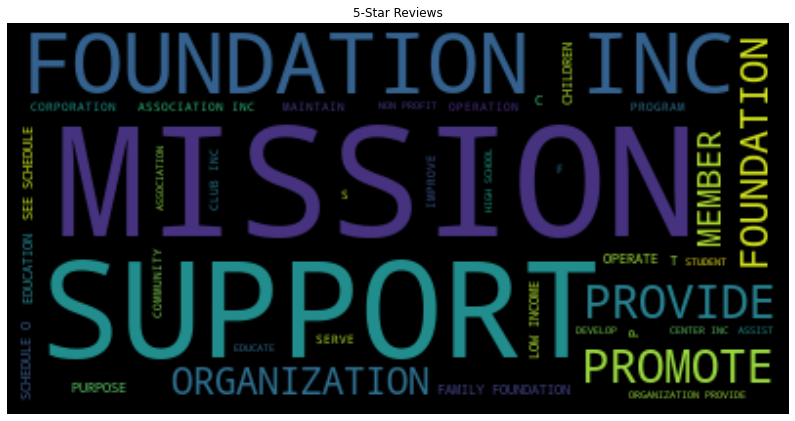

In [9]:
#Display wordcloud
default_colors = wc.to_array()
plt.figure(figsize=(14,12))
plt.title("5-Star Reviews")
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
plt.show()

In [10]:
#seta variable to stopwords
cachedStopWords = set(stopwords.words("english"))
cachedStopWords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [11]:
#tokenize text
tokens = [w for w in nltk.word_tokenize(textdump.lower())
 if w.isalpha()]

In [12]:
#remove new stop words
no_stops = [t for t in tokens
 if t not in cachedStopWords]

In [13]:
#show 20 most common words
Counter(no_stops).most_common(20)

[('inc', 218856),
 ('provide', 166334),
 ('foundation', 148076),
 ('organization', 72937),
 ('services', 67866),
 ('community', 64917),
 ('support', 64880),
 ('association', 63756),
 ('mission', 61260),
 ('education', 57771),
 ('provides', 50135),
 ('promote', 50043),
 ('program', 45091),
 ('school', 44829),
 ('center', 44530),
 ('housing', 42397),
 ('club', 41770),
 ('health', 39823),
 ('care', 35466),
 ('family', 33241)]

In [14]:
#Import 
from nltk.util import ngrams

In [15]:
#create a bigram
bigrams = ngrams(no_stops, 2)
Counter(bigrams).most_common(20)

[(('foundation', 'inc'), 31663),
 (('family', 'foundation'), 17104),
 (('see', 'schedule'), 13138),
 (('association', 'inc'), 9875),
 (('low', 'income'), 8552),
 (('organization', 'provides'), 8531),
 (('inc', 'provide'), 8508),
 (('club', 'inc'), 8347),
 (('volunteer', 'fire'), 7667),
 (('high', 'school'), 7585),
 (('center', 'inc'), 7575),
 (('affordable', 'housing'), 6338),
 (('chamber', 'commerce'), 6224),
 (('provide', 'housing'), 5819),
 (('charitable', 'foundation'), 5722),
 (('provide', 'support'), 5652),
 (('health', 'care'), 5560),
 (('mission', 'provide'), 5044),
 (('credit', 'union'), 4742),
 (('fire', 'department'), 4658)]

In [16]:
#import lemmatizer
from nltk.stem import WordNetLemmatizer

In [17]:
#create lemmatized_5
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

In [18]:
#create counter
text_bow = Counter(lemmatized)
text_bow.most_common(20)

[('inc', 218895),
 ('provide', 166334),
 ('foundation', 148744),
 ('service', 87335),
 ('organization', 80489),
 ('program', 76244),
 ('support', 70744),
 ('community', 69533),
 ('association', 64136),
 ('mission', 62965),
 ('education', 57802),
 ('school', 50747),
 ('provides', 50135),
 ('promote', 50043),
 ('center', 46645),
 ('family', 43583),
 ('club', 43269),
 ('housing', 42404),
 ('fund', 40777),
 ('health', 39831)]

In [19]:
#create bi-gram
bigrams_lem = ngrams(lemmatized, 2)
Counter(bigrams_lem).most_common(20)

[(('foundation', 'inc'), 31713),
 (('family', 'foundation'), 17185),
 (('see', 'schedule'), 13143),
 (('association', 'inc'), 9892),
 (('organization', 'provides'), 8556),
 (('low', 'income'), 8552),
 (('inc', 'provide'), 8508),
 (('club', 'inc'), 8453),
 (('center', 'inc'), 7907),
 (('high', 'school'), 7717),
 (('volunteer', 'fire'), 7671),
 (('affordable', 'housing'), 6338),
 (('chamber', 'commerce'), 6261),
 (('provide', 'housing'), 5819),
 (('program', 'service'), 5767),
 (('charitable', 'foundation'), 5728),
 (('provide', 'support'), 5672),
 (('health', 'care'), 5563),
 (('organization', 'mission'), 5425),
 (('mission', 'provide'), 5093)]

In [20]:
#create trigram
trigrams_lem = ngrams(lemmatized, 3)
Counter(trigrams_lem).most_common(20)

[(('family', 'foundation', 'inc'), 3788),
 (('low', 'income', 'housing'), 3352),
 (('volunteer', 'fire', 'department'), 3290),
 (('provide', 'affordable', 'housing'), 2729),
 (('primary', 'exempt', 'purpose'), 2311),
 (('veteran', 'foreign', 'war'), 1917),
 (('american', 'legion', 'post'), 1824),
 (('provide', 'low', 'income'), 1727),
 (('housing', 'low', 'income'), 1699),
 (('provide', 'fire', 'protection'), 1665),
 (('health', 'welfare', 'benefit'), 1612),
 (('provide', 'financial', 'support'), 1564),
 (('boy', 'girl', 'club'), 1534),
 (('part', 'iii', 'line'), 1288),
 (('volunteer', 'fire', 'company'), 1265),
 (('organization', 'mission', 'provide'), 1224),
 (('improve', 'quality', 'life'), 1195),
 (('county', 'farm', 'bureau'), 1193),
 (('foundation', 'inc', 'provide'), 1188),
 (('provide', 'health', 'welfare'), 1177)]